In [86]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL.Image as Image
from dataclasses import dataclass
import torch 
import cv2
import PIL
from glob import glob
from os import listdir
from os.path import isfile, join
import random

## Data Files 

**· img_align_celeba.zip：** All the face images, cropped and aligned 

**· list_attr_celeba.csv:** Attribute labels for each image. There are 40 attributes. "1" represents positive while "-1" represents negative  

**· list_eval_partition.csv:** Recommended partitioning of images into training, validation, testing sets. Images 1-162770 are training, 162771-182637 are validation, 182638-202599 are testing

**· list_bbox_celeba.csv:** Bounding box information for each image. "x_1" and "y_1" represent the upper left point coordinate of bounding box. "width" and "height" represent the width and height of bounding box

**· list_landmarks_align_celeba.csv:** Image landmarks and their respective coordinates. There are 5 landmarks: left eye, right eye, nose, left mouth, right mouth

In [202]:
# load datasets
attributes_df = pd.read_csv('/Users/evelyn/Desktop/DL_Project/celeba-dataset/attributes.csv', index_col=0).replace([-1], 0)
bboxes_df = pd.read_csv('/Users/evelyn/Desktop/DL_Project/celeba-dataset/bboxes.csv')
landmarks_df = pd.read_csv('/Users/evelyn/Desktop/DL_Project/celeba-dataset/landmarks.csv')
eval_df = pd.read_csv('/Users/evelyn/Desktop/DL_Project/celeba-dataset/evals.csv')

## Exploratory Data Analysis

## Attributes Table

In [203]:
attributes_df

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
000002.jpg,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
000003.jpg,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
000004.jpg,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
000005.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202595.jpg,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
202596.jpg,0,0,0,0,0,1,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1
202597.jpg,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [204]:
attributes_df.columns

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

In [205]:
# Summarize data

# Record counts
print("Record count: ", len(attributes_df))

Record count:  202599


In [206]:
# Missing values
print("Missing values: \n", attributes_df.isnull().sum())


Missing values: 
 5_o_Clock_Shadow       0
Arched_Eyebrows        0
Attractive             0
Bags_Under_Eyes        0
Bald                   0
Bangs                  0
Big_Lips               0
Big_Nose               0
Black_Hair             0
Blond_Hair             0
Blurry                 0
Brown_Hair             0
Bushy_Eyebrows         0
Chubby                 0
Double_Chin            0
Eyeglasses             0
Goatee                 0
Gray_Hair              0
Heavy_Makeup           0
High_Cheekbones        0
Male                   0
Mouth_Slightly_Open    0
Mustache               0
Narrow_Eyes            0
No_Beard               0
Oval_Face              0
Pale_Skin              0
Pointy_Nose            0
Receding_Hairline      0
Rosy_Cheeks            0
Sideburns              0
Smiling                0
Straight_Hair          0
Wavy_Hair              0
Wearing_Earrings       0
Wearing_Hat            0
Wearing_Lipstick       0
Wearing_Necklace       0
Wearing_Necktie        0
Young  

In [37]:
# Schema
print("Schema: \n", attributes_df.dtypes)

Schema: 
 image_id               object
5_o_Clock_Shadow        int64
Arched_Eyebrows         int64
Attractive              int64
Bags_Under_Eyes         int64
Bald                    int64
Bangs                   int64
Big_Lips                int64
Big_Nose                int64
Black_Hair              int64
Blond_Hair              int64
Blurry                  int64
Brown_Hair              int64
Bushy_Eyebrows          int64
Chubby                  int64
Double_Chin             int64
Eyeglasses              int64
Goatee                  int64
Gray_Hair               int64
Heavy_Makeup            int64
High_Cheekbones         int64
Male                    int64
Mouth_Slightly_Open     int64
Mustache                int64
Narrow_Eyes             int64
No_Beard                int64
Oval_Face               int64
Pale_Skin               int64
Pointy_Nose             int64
Receding_Hairline       int64
Rosy_Cheeks             int64
Sideburns               int64
Smiling                 int64


In [39]:
attributes_df.describe() 

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
count,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,...,202599.000000,202599.00000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000
mean,0.111136,0.266981,0.512505,0.204572,0.022443,0.151575,0.240796,0.234532,0.239251,0.147992,...,0.056511,0.48208,0.208402,0.319567,0.188925,0.048460,0.472436,0.122967,0.072715,0.773617
std,0.314301,0.442383,0.499845,0.403389,0.148121,0.358610,0.427568,0.423707,0.426627,0.355093,...,0.230906,0.49968,0.406167,0.466310,0.391450,0.214737,0.499241,0.328400,0.259669,0.418491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
attributes_df['Wearing_Hat'].value_counts()

0    192781
1      9818
Name: Wearing_Hat, dtype: int64

Text(0, 0.5, 'Male VS Female')

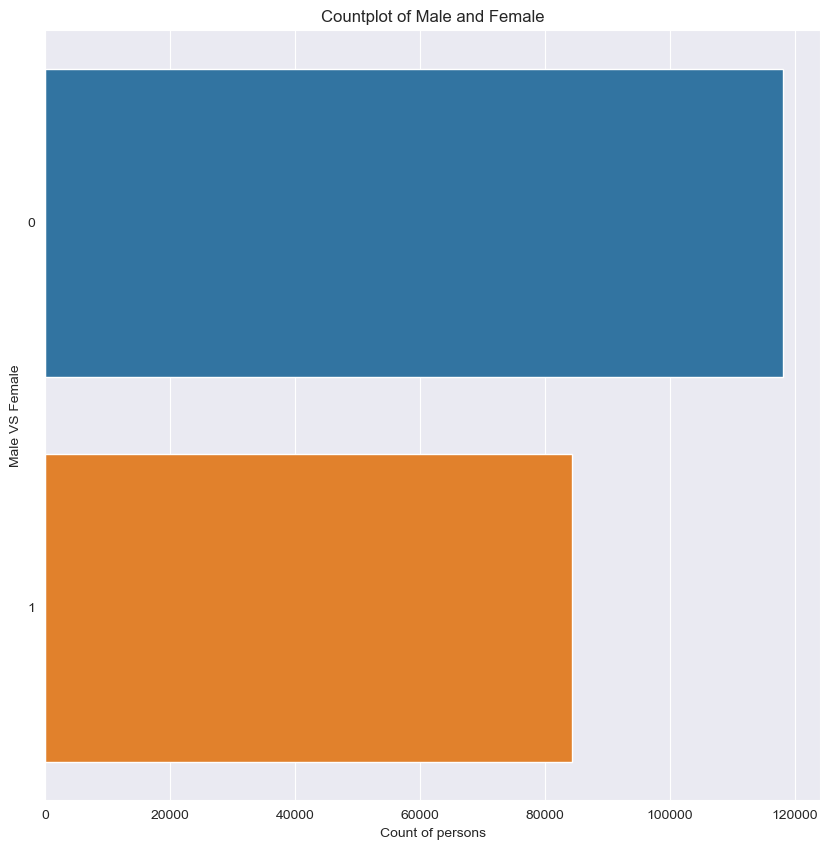

In [201]:
# Countplot of Male and Female

plt.figure(figsize = (10, 10))
sns.countplot(y = 'Male', data =attributes_df)
plt.title('Countplot of Male and Female')
plt.xlabel('Count of persons')
plt.ylabel('Male VS Female')

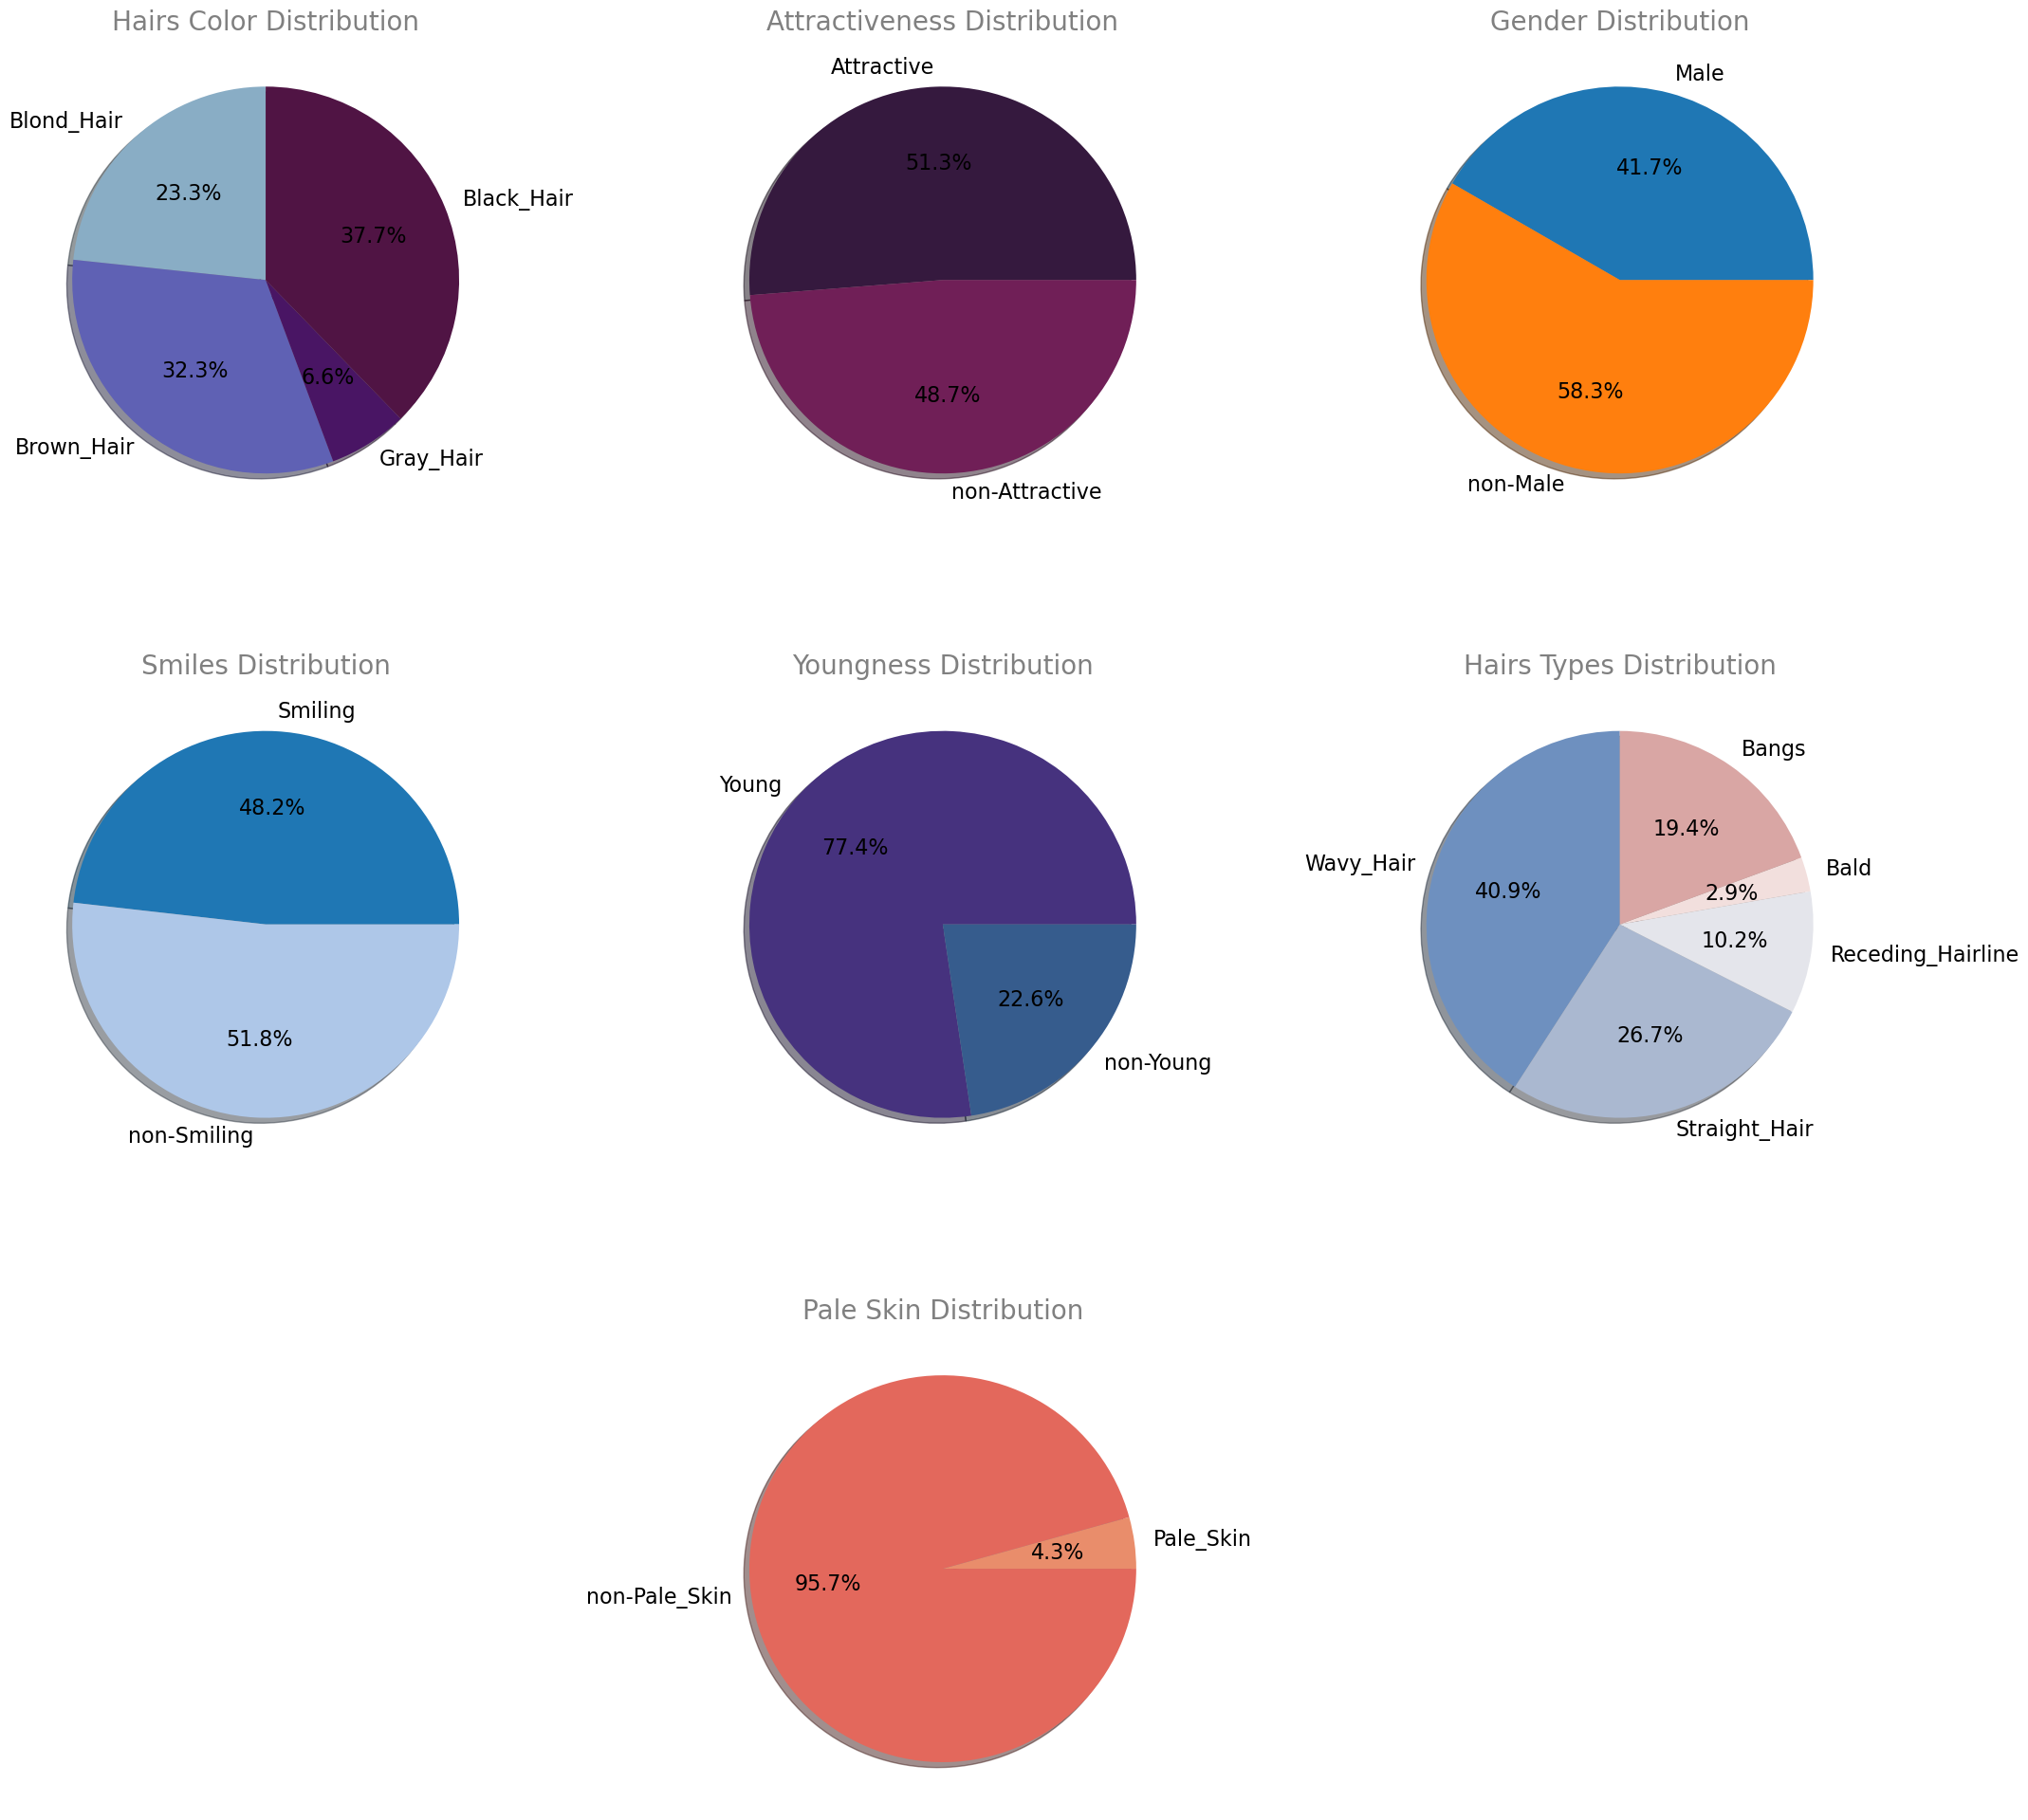

In [32]:
# show attributes distribution in pie charts

def show_pies(df = attributes_df):
        
    
    def show_categorical_dist(labels, 
                              coords,
                              title = None, 
                              colormap = 'rocket', 
                              title_params = dict(
                                  fontsize = 20, 
                                  fontweight = 20, 
                                  color = 'gray'),
                              textprops = dict(fontsize = 16)
                             ):
        
        nums = [df[label].sum() for label in labels]
        colors = sns.color_palette(colormap) 
        
        plt.subplot(*coords)
        plt.title(title, fontdict = title_params)
        plt.pie(
            nums, 
            labels=labels, 
            autopct='%1.1f%%', 
            shadow=True, 
            startangle=90, 
            textprops=textprops,
            colors = colors
        )

        
    def show_binary_dist(label, 
                          coords,
                          title = None, 
                          colormap = 'rocket', 
                          title_params = dict(
                              fontsize = 20, 
                              fontweight = 20, 
                              color = 'gray'),
                          textprops = dict(fontsize = 16)
                         ):
        
        positive = df[label].sum()
        negative = len(df) - positive
        labels = [label, f'non-{label}']
        nums = [positive, negative]
        colors = sns.color_palette(colormap)
        
        plt.subplot(*coords)
        plt.title(title, fontdict = title_params)
        plt.pie(
            nums, 
            labels=labels, 
            autopct='%1.1f%%', 
            shadow=True, 
            startangle=0, 
            textprops=textprops,
            colors = colors
        )
        
    plt.figure(figsize = (25, 25))
    plt.subplots_adjust(  
        wspace = 0.4,   
        hspace = 0.2,
    )
    show_categorical_dist(
        coords = (3, 3, 1),
        labels = ['Blond_Hair', 'Brown_Hair', 'Gray_Hair', 'Black_Hair'], 
        title = 'Hairs Color Distribution',
        colormap = 'twilight'
    )
    
    show_binary_dist(
        coords = (3, 3, 2),
        label = 'Attractive', 
        title = 'Attractiveness Distribution',
        colormap = 'rocket'
    )
    
    show_binary_dist(
        coords = (3, 3, 3),
        label = 'Male', 
        title = 'Gender Distribution',
        colormap = 'tab10'
    )
    
    show_binary_dist(
        coords = (3, 3, 4),
        label = 'Smiling', 
        title = 'Smiles Distribution',
        colormap = 'tab20'
    )
    
    show_binary_dist(
        coords = (3, 3, 5),
        label = 'Young', 
        title = 'Youngness Distribution',
        colormap = 'viridis'
    )
    
    show_categorical_dist(
        coords = (3, 3, 6),
        labels = ['Wavy_Hair', 'Straight_Hair', 'Receding_Hairline', 'Bald', 'Bangs'], 
        title = 'Hairs Types Distribution',
        colormap = 'vlag'
    )
    
    show_binary_dist(
        coords = (3, 3, 8),
        label = 'Pale_Skin', 
        title = 'Pale Skin Distribution',
        colormap = 'flare'
    )
    
    plt.show()
show_pies()

## BBoxes

In [26]:
bboxes_df

,image_id,x_1,y_1,width,height
0,000001.jpg,95,71,226,313
1,000002.jpg,72,94,221,306
2,000003.jpg,216,59,91,126
3,000004.jpg,622,257,564,781
4,000005.jpg,236,109,120,166
...,...,...,...,...,...
202594,202595.jpg,1381,91,221,306
202595,202596.jpg,137,129,114,158
202596,202597.jpg,53,76,91,126
202597,202598.jpg,195,28,91,126


In [59]:
# Summarize data

# Record counts
print("Record count: ", len(bboxes_df))

Record count:  202599


In [60]:
# Missing values

print("Missing values: \n", bboxes_df.isnull().sum())

Missing values: 
 image_id    0
x_1         0
y_1         0
width       0
height      0
dtype: int64


In [61]:
# Schema
print("Schema: \n", bboxes_df.dtypes)

Schema: 
 image_id    object
x_1          int64
y_1          int64
width        int64
height       int64
dtype: object


In [62]:
bboxes_df.describe()

,x_1,y_1,width,height
count,202599.000000,202599.000000,202599.000000,202599.000000
mean,156.764564,84.335505,194.754061,268.922329
std,164.518135,76.067284,141.770066,195.664936
min,1.000000,0.000000,0.000000,0.000000
25%,69.000000,44.000000,120.000000,166.000000
50%,110.000000,68.000000,164.000000,227.000000
75%,181.000000,98.000000,221.000000,306.000000
max,3840.000000,1858.000000,3827.000000,5299.000000


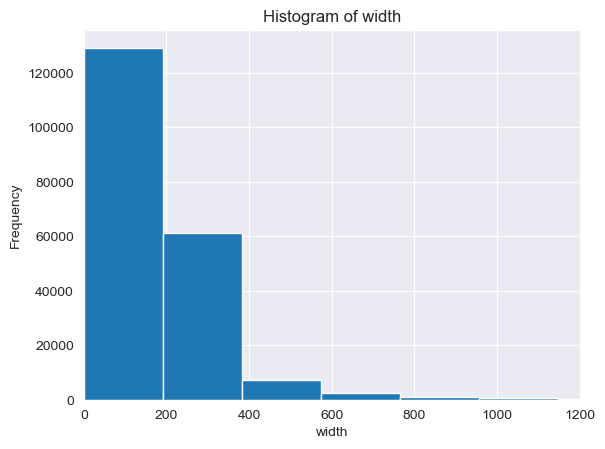

In [68]:
# Plot a histogram of the 'width' column
plt.hist(bboxes_df['width'], bins=20)
plt.title('Histogram of width')
plt.xlabel('width')
plt.ylabel('Frequency')
plt.xlim(0, 1200)
plt.show()

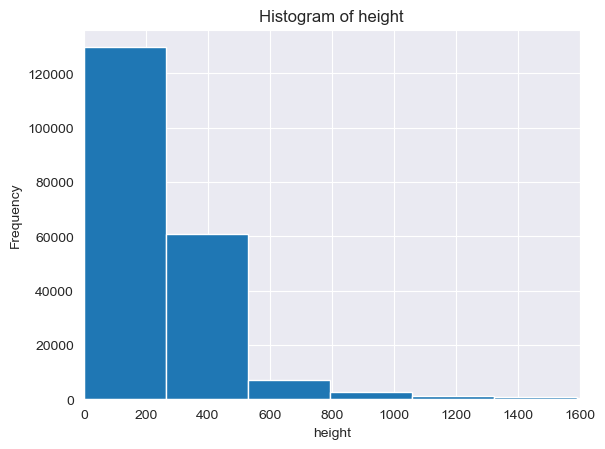

In [72]:
# Plot a histogram of the 'height' column
plt.hist(bboxes_df['height'], bins=20)
plt.title('Histogram of height')
plt.xlabel('height')
plt.ylabel('Frequency')
plt.xlim(0, 1600)
plt.show()

## Landmarks

In [28]:
landmarks_df

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150
...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,69,111,108,111,89,140,73,151,104,153
202595,202596.jpg,67,112,110,112,85,141,66,150,110,150
202596,202597.jpg,69,111,107,111,92,137,68,151,109,153
202597,202598.jpg,69,111,108,111,90,137,71,153,106,151


In [82]:
landmarks_df.columns

Index(['image_id', 'lefteye_x', 'lefteye_y', 'righteye_x', 'righteye_y',
       'nose_x', 'nose_y', 'leftmouth_x', 'leftmouth_y', 'rightmouth_x',
       'rightmouth_y'],
      dtype='object')

In [74]:
# Get record counts, missing values, and schema
record_count = len(landmarks_df)
missing_count = landmarks_df.isna().sum().sum()
schema = landmarks_df.dtypes.to_dict()

# Print results
print(f"Record count: {record_count}")
print(f"Missing value count: {missing_count}")
print("Schema:")
for col_name, dtype in schema.items():
    print(f"\t{col_name}: {dtype}")

Record count: 202599
Missing value count: 0
Schema:
	image_id: object
	lefteye_x: int64
	lefteye_y: int64
	righteye_x: int64
	righteye_y: int64
	nose_x: int64
	nose_y: int64
	leftmouth_x: int64
	leftmouth_y: int64
	rightmouth_x: int64
	rightmouth_y: int64


In [81]:
landmarks_df.describe() 

,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
count,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000
mean,69.353867,111.197982,107.644031,111.161600,88.063140,135.102024,71.247459,152.113011,105.586429,152.194660
std,1.717952,1.129284,1.690252,1.169229,6.647733,4.245078,3.168011,1.799343,3.233125,1.752368
min,56.000000,98.000000,90.000000,95.000000,57.000000,93.000000,57.000000,116.000000,82.000000,114.000000
25%,68.000000,111.000000,107.000000,111.000000,84.000000,133.000000,69.000000,151.000000,103.000000,151.000000
50%,69.000000,111.000000,108.000000,111.000000,88.000000,135.000000,72.000000,152.000000,105.000000,152.000000
75%,70.000000,112.000000,109.000000,112.000000,92.000000,138.000000,73.000000,153.000000,108.000000,153.000000
max,88.000000,129.000000,124.000000,122.000000,121.000000,156.000000,90.000000,174.000000,120.000000,173.000000


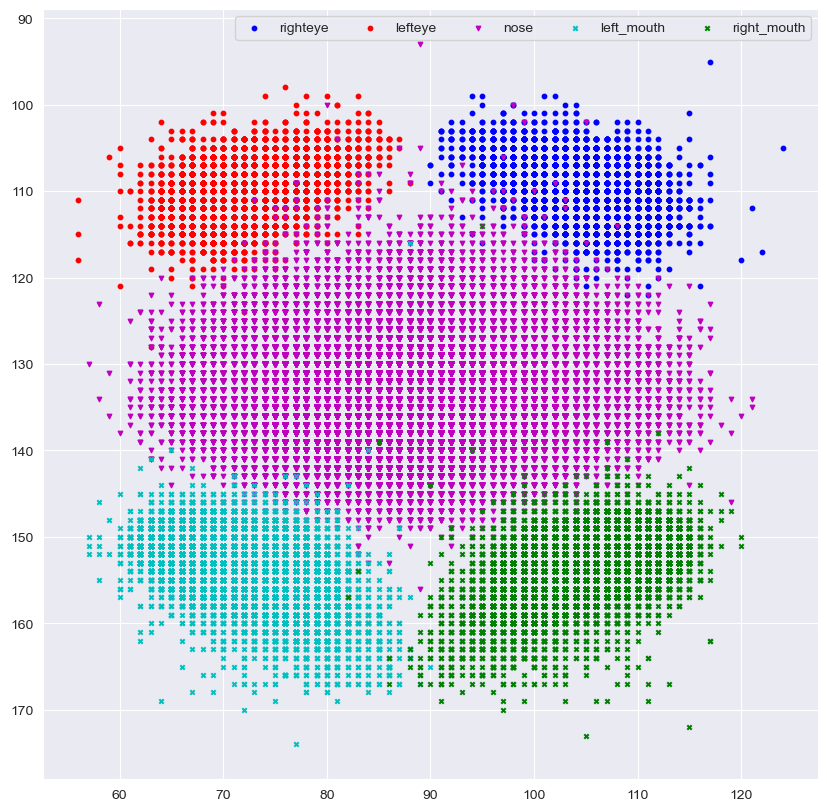

In [200]:
# plot for distribution of landmarks

def show_landmarks_distribution(df = landmarks_df):
    
    sns.set_style("darkgrid")
    plt.figure(figsize = (10, 10))
    plt.gca().invert_yaxis()
    
    plt.scatter(
        x = df.righteye_x.tolist(), 
        y = df.righteye_y.tolist(), 
        s=10, 
        c='b', 
        marker="o", 
        label='righteye'
    )
    
    plt.scatter(
        x = df.lefteye_x.tolist(), 
        y = df.lefteye_y.tolist(), 
        s=10, 
        c='r', 
        marker="o", 
        label='lefteye'
    )
    
    plt.scatter(
        x = df.nose_x.tolist(), 
        y = df.nose_y.tolist(), 
        s=10, 
        c='m', 
        marker="v", 
        label='nose'
    )
    
    plt.scatter(
        x = df.leftmouth_x.tolist(), 
        y = df.leftmouth_y.tolist(), 
        s=10, 
        c='c', 
        marker="x", 
        label='left_mouth'
    )
    plt.scatter(
        x = df.rightmouth_x.tolist(), 
        y = df.rightmouth_y.tolist(), 
        s=10, 
        c='g', 
        marker="x", 
        label='right_mouth'
    )
    
    plt.legend(loc='best', ncol = 5);
    plt.show()
    
    
show_landmarks_distribution()

## Eval

In [29]:
eval_df

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0
...,...,...
202594,202595.jpg,2
202595,202596.jpg,2
202596,202597.jpg,2
202597,202598.jpg,2


In [77]:
# Get record counts, missing values, and schema
record_count = len(eval_df)
missing_count = eval_df.isna().sum().sum()
schema = eval_df.dtypes.to_dict()

# Print results
print(f"Record count: {record_count}")
print(f"Missing value count: {missing_count}")
print("Schema:")
for col_name, dtype in schema.items():
    print(f"\t{col_name}: {dtype}")


Record count: 202599
Missing value count: 0
Schema:
	image_id: object
	partition: int64


In [80]:
# see value counts
eval_df['partition'].value_counts()

0    162770
2     19962
1     19867
Name: partition, dtype: int64

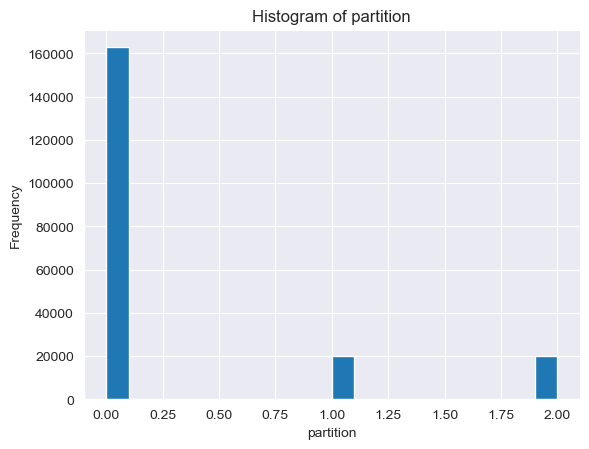

In [78]:
# Plot a histogram of the 'x1' column
plt.hist(eval_df['partition'], bins=20)
plt.title('Histogram of partition')
plt.xlabel('partition')
plt.ylabel('Frequency')
plt.show()

## Image

### See example Images and their attributes

In [16]:
main_folder = "/Users/evelyn/Desktop/DL_Project/celeba-dataset/"
images_folder = main_folder + 'img_align_celeba/'

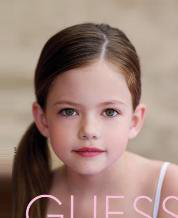

In [212]:
# plot image
#IMAGE_SHAPE = (224, 224)
image_example1 = images_folder + '020007.jpg'
#image_example = Image.open(image_example).resize(IMAGE_SHAPE)
see_example1 = Image.open(image_example1)
see_example1

In [213]:
attributes_df.loc[image_example1.split('/')[-1]][['Smiling','Male','Young']]

Smiling    0
Male       0
Young      1
Name: 020007.jpg, dtype: int64

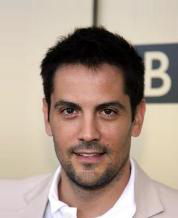

In [214]:
image_example2 = images_folder + '028809.jpg'
see_example2 = Image.open(image_example2)
see_example2

In [215]:
attributes_df.loc[image_example2.split('/')[-1]][['Smiling','Male','Young']]

Smiling    1
Male       1
Young      0
Name: 028809.jpg, dtype: int64